# ML Methods for Final Proj
We will be running logistic regression models for both prediction and explanation for the diabetes CSV of our data. 

This CSV has been generated via `./final-proj-acq.ipynb` and can be found in `/data/nhs-diabetes-health-habits-407.csv`

Outline of the document:
- RQ1: Substance and Diabetes
    - 1.1 Logistic Regression (Explanation)
    - 1.2 Logistic Regression (Prediction)
    - 1.3 Decision Tree (Prediction)
- RQ2: Exercise and Diabetes
    - 2.1 Logistic Regression (Explanation)
    - 2.2 Logistic Regression (Prediction)
    - 2.3 Decision Tree (Prediction)
- RQ3: Diet and Diabetes
    - 3.1 Logistic Regression (Explanation)
    - 3.2 Logistic Regression (Prediction)
    - 3.3 Decision Tree (Prediction)
- 4: All Features
    - 4.1 Logistic Regression (Explanation)
    - 4.2 Logistic Regression (Prediction)
    - 4.3 Decision Tree (Prediction)

In [1]:
# Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
# First, read in the data
df = pd.read_csv("../data/nhs-diabetes-health-habits-407.csv")
df

,SMKAGE_A,CIGNOW_A,SMK30D_A,CIGAR30D_A,DRK12MN_A,DRK12MYR_A,DRKAVG12M_A,DRKBNG30D_A,MODNR_A,VIGNR_A,...,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,PREDIB_A,GESDIB_A,DIBEV_A,DIBPILL_A,DIBINS_A,DIBTYPE_A
0,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3.0,0.0,...,1.0,1.0,1.0,0.0,2.0,NaN,2.0,NaN,NaN,NaN
1,18.0,NaN,NaN,NaN,9.0,108.0,NaN,NaN,7.0,1.0,...,4.0,1.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,7.0,3.0,...,7.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
3,NaN,NaN,NaN,0.0,12.0,12.0,1.0,NaN,0.0,0.0,...,4.0,1.0,0.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,52.0,1.0,NaN,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,40.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,...,2.0,0.0,1.0,0.0,2.0,NaN,2.0,NaN,NaN,NaN
27647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,2.0,0.0,0.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN
27648,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
27649,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3.0,5.0,...,6.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN


In [3]:
# Split into four DataFrames:

# - substance_features
substance_cols = ['SMKAGE_A', 'CIGNOW_A', 'SMK30D_A', 'CIGAR30D_A', 'DRK12MN_A', 'DRK12MYR_A', 'DRKAVG12M_A', 'DRKBNG30D_A']
substance_df = df[substance_cols]
# - exercise_features
exercise_cols = ['MODNR_A', 'VIGNR_A', 'MODMIN_A', 'VIGMIN_A']
exercise_df = df[exercise_cols]
# - diet_features
diet_cols = ['SODANO_A', 'FRJUICNO_A', 'COFFEENO_A', 'SPORDRNO_A',
            'FRTDRNO_A', 'FRUITNO_A', 'SALADNO_A', 'POTATONO_A',
            'FRIESNO_A', 'BEANSNO_A', 'OVEGNO_A', 'SALSANO_A',
            'PIZZANO_A', 'TOMSAUNO_A']
diet_df = df[diet_cols]
# - diabetes-related features 
diabetes_cols = ['PREDIB_A', 'GESDIB_A', 'DIBEV_A', 'DIBPILL_A', 'DIBINS_A', 'DIBTYPE_A']
diabetes_df = df[diabetes_cols]

In [4]:
# First, what would be best to predict
diabetes_df.isnull().sum()

# Given the output below, `DIBEV_A: Ever had diabetes` is the best target to predict since it is only missing 32 values.

PREDIB_A        48
GESDIB_A     12630
DIBEV_A         32
DIBPILL_A    22027
DIBINS_A     22025
DIBTYPE_A    24858
dtype: int64

In [5]:
# Define our target
target_df = diabetes_df['DIBEV_A']
target_df

0        2.0
1        2.0
2        1.0
3        2.0
4        2.0
        ... 
27646    2.0
27647    2.0
27648    2.0
27649    2.0
27650    2.0
Name: DIBEV_A, Length: 27651, dtype: float64

In [6]:
# For logistic regression, we need to convert the target to a binary value (0 or 1)
# Right now, 1 = Yes and 2 = No
target_df = target_df.replace(2, 0)
target_df

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
27646    0.0
27647    0.0
27648    0.0
27649    0.0
27650    0.0
Name: DIBEV_A, Length: 27651, dtype: float64

## RQ 1: Substance & Diabetes
Investigating to answer our research question: how does substance use affect diabetes? Is there a correlation? 

In [7]:
# First, combine substance_df to target_df (add the columns)
substance_and_diabetes_df = pd.concat([substance_df, target_df], axis=1)
substance_and_diabetes_df

,SMKAGE_A,CIGNOW_A,SMK30D_A,CIGAR30D_A,DRK12MN_A,DRK12MYR_A,DRKAVG12M_A,DRKBNG30D_A,DIBEV_A
0,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1,18.0,NaN,NaN,NaN,9.0,108.0,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0
3,NaN,NaN,NaN,0.0,12.0,12.0,1.0,NaN,0.0
4,NaN,NaN,NaN,NaN,1.0,52.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
27646,40.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
27647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
27648,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,0.0
27649,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0


In [8]:
# Check for nulls
substance_and_diabetes_df.isnull().sum()

# If we were to drop ALL these columns, we'd have an empty DataFrame. Instead, let's select columns that have less NULL values 
# And use those for analysis. Below, we notice that DRK12MN_A and DRK12MYR_A have the least amount of NULL values
# We want at least one smoking-related column, so we can opt for SMKAGE_A since it has the least NULL values

SMKAGE_A       17887
CIGNOW_A       25236
SMK30D_A       26957
CIGAR30D_A     19939
DRK12MN_A       4086
DRK12MYR_A      4090
DRKAVG12M_A     9277
DRKBNG30D_A    22208
DIBEV_A           32
dtype: int64

In [9]:
# Filter out to the columns we want:
substance_and_diabetes_df = substance_and_diabetes_df[['SMKAGE_A', 'DRK12MN_A', 'DRK12MYR_A', 'DIBEV_A']]
# Drop nulls:
substance_and_diabetes_df = substance_and_diabetes_df.dropna()
substance_and_diabetes_df

# And now we have ~9000 clean samples to run our logistic regressions on

,SMKAGE_A,DRK12MN_A,DRK12MYR_A,DIBEV_A
0,18.0,0.0,0.0,0.0
1,18.0,9.0,108.0,0.0
6,17.0,1.0,52.0,0.0
7,16.0,2.0,104.0,0.0
8,18.0,6.0,312.0,0.0
...,...,...,...,...
27632,18.0,1.0,52.0,0.0
27634,18.0,1.0,52.0,0.0
27636,21.0,3.0,36.0,0.0
27638,18.0,3.0,156.0,0.0


### RQ1-1: Logistic Regression (Explanation)

In [10]:
# Before we continue, check for Spearman correlation between the features and the target, threshold = 0.7
substance_and_diabetes_df.corr(method="spearman", numeric_only=True).round(2)

,SMKAGE_A,DRK12MN_A,DRK12MYR_A,DIBEV_A
SMKAGE_A,1.00,0.03,0.02,-0.04
DRK12MN_A,0.03,1.00,0.78,-0.13
DRK12MYR_A,0.02,0.78,1.00,-0.17
DIBEV_A,-0.04,-0.13,-0.17,1.00


In [11]:
# There is 0.78 correlation between DRK12MN_A and DRK12MYR_A, so we can drop one of them 
# We will keep DRK12MYR_A: Days drank alcohol per year, past 12m (missing 3922)
substance_and_diabetes_df = substance_and_diabetes_df.drop(columns=['DRK12MN_A'])

In [12]:
# Now, we split our data into the features (X) and target (y)
substance_X = substance_and_diabetes_df.drop(['DIBEV_A'], axis=1)
substance_y = substance_and_diabetes_df['DIBEV_A']

substance_X

,SMKAGE_A,DRK12MYR_A
0,18.0,0.0
1,18.0,108.0
6,17.0,52.0
7,16.0,104.0
8,18.0,312.0
...,...,...
27632,18.0,52.0
27634,18.0,52.0
27636,21.0,36.0
27638,18.0,156.0


In [13]:
# We add a constant to prepare for logistic regression (explanation model)
substance_X = sm.add_constant(substance_X)

# We fit our logistical regression model
substance_logistic_exp = sm.Logit(substance_y, substance_X).fit()

# Checking the performance of the model
print(substance_logistic_exp.summary())

# We can see that the P-values for all our features are less than 0.05, so we can say that all our features are significant to the model.

Optimization terminated successfully.
         Current function value: 0.362868
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DIBEV_A   No. Observations:                 9346
Model:                          Logit   Df Residuals:                     9343
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                 0.03031
Time:                        12:41:12   Log-Likelihood:                -3391.4
converged:                       True   LL-Null:                       -3497.4
Covariance Type:            nonrobust   LLR p-value:                 9.021e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3626      0.092    -14.754      0.000      -1.544      -1.182
SMKAGE_A      -0.0160      0.

In [14]:
# Exponetializing the Beta Coefficients to convert them into Odds Ratios
np.exp(substance_logistic_exp.params)

# For odds ratios - if it is greater than 1, event is more likely to occur, if it is < 1, the event is less likely to occur

const         0.256003
SMKAGE_A      0.984154
DRK12MYR_A    0.994938
dtype: float64

In [15]:
# Exponetializing the 95% confidence interval to convert them into Odds Ratios
np.exp(substance_logistic_exp.conf_int())

,0,1
const,0.213615,0.306801
SMKAGE_A,0.975141,0.993250
DRK12MYR_A,0.994116,0.995761


### RQ1-2: Logistic Regression (Prediction)

In [16]:
from sklearn.model_selection import train_test_split
X_train_substance, X_test_substance, y_train_substance, y_test_substance = train_test_split(substance_X, substance_y, test_size=0.2, random_state=407)

# Define and fit our logistic regression model
logistic_substance = LogisticRegression()
logistic_substance = logistic_substance.fit(X_train_substance, y_train_substance)

# Predict Diabetes
logistic_substance_pred_test = logistic_substance.predict(X_test_substance)

In [17]:
# Accuracy Score for Testing Data
print(logistic_substance.score(X_test_substance, y_test_substance))

# This score is misleading, see confusion matrix below (we are predicting 0s for everything)

0.8748663101604278


In [18]:
# Accuracy Score for Training Data
print(logistic_substance.score(X_train_substance, y_train_substance))

# This score is misleading, see confusion matrix below (we are predicting 0s for everything)

0.8766720171214554


In [19]:
# Printing the classification report
print(classification_report(y_test_substance, logistic_substance_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1636
         1.0       0.00      0.00      0.00       234

    accuracy                           0.87      1870
   macro avg       0.44      0.50      0.47      1870
weighted avg       0.77      0.87      0.82      1870



[[1636    0]
 [ 234    0]]


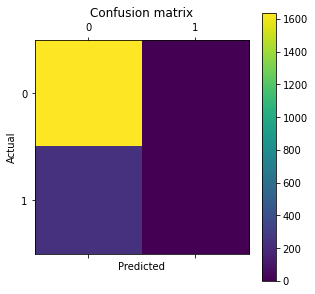

In [20]:
# Printing the confusion matrix
logistic_matrix = confusion_matrix(y_test_substance, logistic_substance_pred_test)
print(logistic_matrix)

# Visualizing the confusion matrix
import pylab as plt
plt.matshow(logistic_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# An immediate issue with our model is that it never predicts a positive case of diabetes (1).

### RQ1-3: Decision Tree

In [21]:
# Define our classifier model, fit using the prior defined train-test split
treeclf_substance = tree.DecisionTreeClassifier(min_samples_split=15, random_state=407)
treeclf_substance = treeclf_substance.fit(X_train_substance, y_train_substance)

# Predict Diabetes
treeclf_substance_pred_test = treeclf_substance.predict(X_test_substance)

In [22]:
# Accuracy Score for Testing Data
print(treeclf_substance.score(X_test_substance, y_test_substance))

0.8716577540106952


In [23]:
# Accuracy Score for Training Data
print(treeclf_substance.score(X_train_substance, y_train_substance))

0.878143392188336


In [24]:
# Print the classification report
print(classification_report(y_test_substance, treeclf_substance_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1636
         1.0       0.12      0.00      0.01       234

    accuracy                           0.87      1870
   macro avg       0.50      0.50      0.47      1870
weighted avg       0.78      0.87      0.82      1870



[[1629    7]
 [ 233    1]]


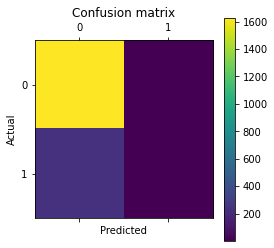

In [25]:
# Printing the confusion matrix
treeclf_matrix_substance = confusion_matrix(y_test_substance, treeclf_substance_pred_test)
print(treeclf_matrix_substance)

# Visualizing the confusion matrix
plt.matshow(treeclf_matrix_substance)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# We can see our model does predict a few positive cases of diabetes (1), but it is still not very good.

## RQ 2: Exercise & Diabetes


In [26]:
# Repeat what we did for RQ1.1, but for exercise_df
exercise_and_diabetes_df = pd.concat([exercise_df, target_df], axis=1)
exercise_and_diabetes_df

,MODNR_A,VIGNR_A,MODMIN_A,VIGMIN_A,DIBEV_A
0,3.0,0.0,10.0,NaN,0.0
1,7.0,1.0,120.0,60.0,0.0
2,7.0,3.0,30.0,60.0,1.0
3,0.0,0.0,NaN,NaN,0.0
4,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...
27646,2.0,5.0,180.0,360.0,0.0
27647,4.0,2.0,240.0,30.0,0.0
27648,0.0,0.0,NaN,NaN,0.0
27649,3.0,5.0,30.0,15.0,0.0


In [27]:
# Check for nulls
exercise_and_diabetes_df.isnull().sum()

# THE VIGMIN_A column has almost 20k null, so let's remove that first
exercise_and_diabetes_df = exercise_and_diabetes_df.drop(columns=['VIGMIN_A'])  

# Then, drop our nulls:
exercise_and_diabetes_df = exercise_and_diabetes_df.dropna()
exercise_and_diabetes_df

# And now we have ~18603 clean samples to run our logistic regressions on

,MODNR_A,VIGNR_A,MODMIN_A,DIBEV_A
0,3.0,0.0,10.0,0.0
1,7.0,1.0,120.0,0.0
2,7.0,3.0,30.0,1.0
6,5.0,2.0,60.0,0.0
10,1.0,0.0,15.0,0.0
...,...,...,...,...
27645,2.0,2.0,20.0,0.0
27646,2.0,5.0,180.0,0.0
27647,4.0,2.0,240.0,0.0
27649,3.0,5.0,30.0,0.0


### RQ2-1: Logistic Regression (Explanation)

In [28]:
# Before we continue, check for Spearman correlation between the features and the target, threshold = 0.7
exercise_and_diabetes_df.corr(method="spearman", numeric_only=True).round(2)

# No multicollienarity issues, so we can proceed

,MODNR_A,VIGNR_A,MODMIN_A,DIBEV_A
MODNR_A,1.00,0.19,0.09,-0.02
VIGNR_A,0.19,1.00,0.16,-0.12
MODMIN_A,0.09,0.16,1.00,-0.06
DIBEV_A,-0.02,-0.12,-0.06,1.00


In [29]:
# Now, we split our data into the features (X) and target (y)
exercise_X = exercise_and_diabetes_df.drop(['DIBEV_A'], axis=1)
exercise_y = exercise_and_diabetes_df['DIBEV_A']

exercise_X

,MODNR_A,VIGNR_A,MODMIN_A
0,3.0,0.0,10.0
1,7.0,1.0,120.0
2,7.0,3.0,30.0
6,5.0,2.0,60.0
10,1.0,0.0,15.0
...,...,...,...
27645,2.0,2.0,20.0
27646,2.0,5.0,180.0
27647,4.0,2.0,240.0
27649,3.0,5.0,30.0


In [30]:
# We add a constant to prepare for logistic regression (explanation model)
exercise_X = sm.add_constant(exercise_X)

# We fit our logistical regression model
exercise_logistic_exp = sm.Logit(exercise_y, exercise_X).fit()

# Checking the performance of the model
print(exercise_logistic_exp.summary())

# We can see below that VIGNR_A and MODMIN_A are significant.. more explanation later

Optimization terminated successfully.
         Current function value: 0.275566
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                DIBEV_A   No. Observations:                18603
Model:                          Logit   Df Residuals:                    18599
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                 0.01647
Time:                        12:41:14   Log-Likelihood:                -5126.4
converged:                       True   LL-Null:                       -5212.2
Covariance Type:            nonrobust   LLR p-value:                 5.622e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1167      0.044    -47.962      0.000      -2.203      -2.030
MODNR_A       -0.0036      0.

In [31]:
# Exponentializing the Beta Coefficients to convert them into Odds Ratios
np.exp(exercise_logistic_exp.params)

# For odds ratios - if it is greater than 1, event is more likely to occur, if it is < 1, the event is less likely to occur

const       0.120428
MODNR_A     0.996383
VIGNR_A     0.781490
MODMIN_A    0.998604
dtype: float64

In [32]:
# Exponetializing the 95% confidence interval to convert them into Odds Ratios
np.exp(exercise_logistic_exp.conf_int())

,0,1
const,0.110449,0.131309
MODNR_A,0.986231,1.006640
VIGNR_A,0.747555,0.816965
MODMIN_A,0.997579,0.999630


### RQ2-2: Logistic Regression (Prediction)

In [33]:
X_train_exercise, X_test_exercise, y_train_exercise, y_test_exercise = train_test_split(exercise_X, exercise_y, test_size=0.2, random_state=407)

# Define and fit our logistic regression model
logistic_exercise = LogisticRegression()
logistic_exercise = logistic_exercise.fit(X_train_exercise, y_train_exercise)

# Predict Diabetes
logistic_exercise_pred_test = logistic_exercise.predict(X_test_exercise)

In [34]:
# Accuracy Score for Testing Data
print(logistic_exercise.score(X_test_exercise, y_test_exercise))

# This score is misleading, see confusion matrix below (we are predicting 0s for everything)

0.9177640419242139


In [35]:
# Accuracy Score for Training Data
print(logistic_exercise.score(X_train_exercise, y_train_exercise))

# This score is misleading, see confusion matrix below (we are predicting 0s for everything)

0.9198360435425346


In [36]:
# Print the classification report
print(classification_report(y_test_exercise, logistic_exercise_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3415
         1.0       0.00      0.00      0.00       306

    accuracy                           0.92      3721
   macro avg       0.46      0.50      0.48      3721
weighted avg       0.84      0.92      0.88      3721



[[3415    0]
 [ 306    0]]


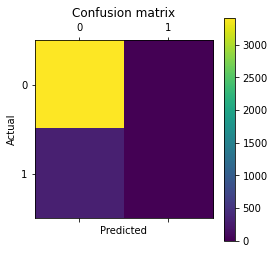

In [37]:
# Print the confusion matrix
logistic_matrix_exercise = confusion_matrix(y_test_exercise, logistic_exercise_pred_test)
print(logistic_matrix_exercise)

# Visualize the confusion matrix
plt.matshow(logistic_matrix_exercise)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# again, our model never predicts a positive (yes diabetes) case

### RQ2-3: Decision Tree


In [38]:
# Define our classifier model, fit using the prior defined train-test split
treeclf_exercise = tree.DecisionTreeClassifier(min_samples_split=15, random_state=407)
treeclf_exercise = treeclf_exercise.fit(X_train_exercise, y_train_exercise)

# Predict Diabetes
treeclf_exercise_pred_test = treeclf_exercise.predict(X_test_exercise)

In [39]:
# Accuracy Score for Testing Data
print(treeclf_exercise.score(X_test_exercise, y_test_exercise))

0.91722655200215


In [40]:
# Accuracy Score for Training Data
print(treeclf_exercise.score(X_train_exercise, y_train_exercise))

0.920642386775971


In [41]:
# Print the classification report
print(classification_report(y_test_exercise, treeclf_exercise_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3415
         1.0       0.00      0.00      0.00       306

    accuracy                           0.92      3721
   macro avg       0.46      0.50      0.48      3721
weighted avg       0.84      0.92      0.88      3721



[[3413    2]
 [ 306    0]]


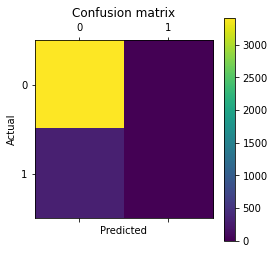

In [42]:
# Print the confusion matrix
treeclf_matrix_exercise = confusion_matrix(y_test_exercise, treeclf_exercise_pred_test)
print(treeclf_matrix_exercise)

# Visualize the confusion matrix
plt.matshow(treeclf_matrix_exercise)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# This model still fails to predict most positive cases of diabetes

## RQ 3: Diet & Diabetes


In [43]:
diet_and_diabetes_df = pd.concat([diet_df, target_df], axis=1)
diet_and_diabetes_df

,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,FRTDRNO_A,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
0,3.0,2.0,0.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,3.0,0.0,3.0,3.0,0.0,20.0,5.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,0.0
2,0.0,0.0,7.0,0.0,0.0,7.0,4.0,3.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,4.0,1.0,0.0,2.0,0.0
4,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,0.0,2.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,3.0,2.0,0.0,1.0,0.0,0.0
27647,0.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
27648,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
27649,2.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,6.0,0.0,1.0,1.0,0.0


In [44]:
# Check for nulls 
diet_and_diabetes_df.isnull().sum()

# Not many nulls for all the columns, so we are comfortable continuing with them all

SODANO_A      1055
FRJUICNO_A    1090
COFFEENO_A    1049
SPORDRNO_A    1049
FRTDRNO_A     1067
FRUITNO_A     1090
SALADNO_A     1086
POTATONO_A    1133
FRIESNO_A     1100
BEANSNO_A     1138
OVEGNO_A      1141
SALSANO_A     1135
PIZZANO_A     1122
TOMSAUNO_A    1173
DIBEV_A         32
dtype: int64

In [45]:
# Drop the nulls
diet_and_diabetes_df = diet_and_diabetes_df.dropna()
diet_and_diabetes_df

# Wow! 26k rows to work with

,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,FRTDRNO_A,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
0,3.0,2.0,0.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,3.0,0.0,3.0,3.0,0.0,20.0,5.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,0.0
2,0.0,0.0,7.0,0.0,0.0,7.0,4.0,3.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,4.0,1.0,0.0,2.0,0.0
4,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,0.0,2.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,3.0,2.0,0.0,1.0,0.0,0.0
27647,0.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
27648,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
27649,2.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,6.0,0.0,1.0,1.0,0.0


### RQ3-1: Logistic Regression (Explanation)

In [46]:
# Before we continue, check for Spearman correlation between the features and the target, threshold = 0.7
diet_and_diabetes_df.corr(method="spearman", numeric_only=True).round(2)

# No multicollienarity issues, so we can proceed

,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,FRTDRNO_A,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
SODANO_A,1.00,0.19,0.18,0.18,0.23,0.06,-0.01,0.09,0.25,0.07,0.06,0.06,0.17,0.10,-0.08
FRJUICNO_A,0.19,1.00,0.12,0.12,0.22,0.15,0.10,0.13,0.15,0.12,0.10,0.07,0.10,0.12,-0.06
COFFEENO_A,0.18,0.12,1.00,0.05,0.10,0.09,0.05,0.05,0.09,0.06,0.09,0.04,0.05,0.05,-0.07
SPORDRNO_A,0.18,0.12,0.05,1.00,0.16,0.06,0.03,0.06,0.18,0.05,0.06,0.13,0.16,0.10,-0.08
FRTDRNO_A,0.23,0.22,0.10,0.16,1.00,0.05,0.01,0.07,0.15,0.07,0.04,0.05,0.09,0.08,-0.05
FRUITNO_A,0.06,0.15,0.09,0.06,0.05,1.00,0.33,0.18,0.16,0.15,0.39,0.14,0.13,0.14,-0.02
SALADNO_A,-0.01,0.10,0.05,0.03,0.01,0.33,1.00,0.19,0.16,0.17,0.35,0.22,0.15,0.18,-0.03
POTATONO_A,0.09,0.13,0.05,0.06,0.07,0.18,0.19,1.00,0.32,0.24,0.19,0.15,0.21,0.28,-0.01
FRIESNO_A,0.25,0.15,0.09,0.18,0.15,0.16,0.16,0.32,1.00,0.19,0.18,0.23,0.34,0.27,-0.03
BEANSNO_A,0.07,0.12,0.06,0.05,0.07,0.15,0.17,0.24,0.19,1.00,0.17,0.27,0.16,0.24,-0.01


In [47]:
# Now, we split our data into the features (X) and target (y)
diet_X = diet_and_diabetes_df.drop(['DIBEV_A'], axis=1)
diet_y = diet_and_diabetes_df['DIBEV_A']

diet_X

,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,FRTDRNO_A,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A
0,3.0,2.0,0.0,0.0,1.0,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0
1,3.0,0.0,3.0,3.0,0.0,20.0,5.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0
2,0.0,0.0,7.0,0.0,0.0,7.0,4.0,3.0,0.0,0.0,7.0,3.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,4.0,1.0,0.0,2.0
4,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,0.0,2.0,0.0,0.0,0.0,3.0,3.0,1.0,5.0,3.0,2.0,0.0,1.0,0.0
27647,0.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0
27648,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
27649,2.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,6.0,0.0,1.0,1.0


In [48]:
# We add a constant to prepare for logistic regression (explanation model)
diet_X = sm.add_constant(diet_X)

# We fit our logistical regression model
diet_logistic_exp = sm.Logit(diet_y, diet_X).fit()

# Checking the performance of the model
print(diet_logistic_exp.summary())

# TODO: Interpret P-values

Optimization terminated successfully.
         Current function value: 0.334359
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                DIBEV_A   No. Observations:                26207
Model:                          Logit   Df Residuals:                    26192
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                 0.01336
Time:                        12:41:15   Log-Likelihood:                -8762.5
converged:                       True   LL-Null:                       -8881.2
Covariance Type:            nonrobust   LLR p-value:                 1.179e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8209      0.035    -51.807      0.000      -1.890      -1.752
SODANO_A      -0.0092      0.

In [49]:
# Exponentializing the Beta Coefficients to convert them into Odds Ratios
np.exp(diet_logistic_exp.params)

# For odds ratios - if it is greater than 1, event is more likely to occur, if it is < 1, the event is less likely to occur

const         0.161880
SODANO_A      0.990880
FRJUICNO_A    0.974423
COFFEENO_A    0.985843
SPORDRNO_A    0.953821
FRTDRNO_A     0.984914
FRUITNO_A     1.009188
SALADNO_A     0.982242
POTATONO_A    1.016530
FRIESNO_A     1.013680
BEANSNO_A     1.003576
OVEGNO_A      1.012672
SALSANO_A     0.951071
PIZZANO_A     0.884583
TOMSAUNO_A    0.990100
dtype: float64

In [50]:
# Exponetializing the 95% confidence interval to convert them into Odds Ratios
np.exp(diet_logistic_exp.conf_int())

,0,1
const,0.151104,0.173425
SODANO_A,0.980166,1.001712
FRJUICNO_A,0.961412,0.987609
COFFEENO_A,0.976936,0.994831
SPORDRNO_A,0.933529,0.974554
FRTDRNO_A,0.962210,1.008154
FRUITNO_A,1.000700,1.017748
SALADNO_A,0.970970,0.993646
POTATONO_A,1.002269,1.030994
FRIESNO_A,0.999976,1.027573


### RQ3-2: Logistic Regression (Prediction)

In [51]:
X_train_diet, X_test_diet, y_train_diet, y_test_diet = train_test_split(diet_X, diet_y, test_size=0.2, random_state=407)

# Define and fit our logistic regression model
logistic_diet = LogisticRegression()
logistic_diet = logistic_diet.fit(X_train_diet, y_train_diet)

# Predict Diabetes
logistic_diet_pred_test = logistic_diet.predict(X_test_diet)

In [52]:
# Accuracy Score for Testing Data
print(logistic_diet.score(X_test_diet, y_test_diet))

# misleading, our model ALMOST never predicts a positive (yes diabetes) case

0.890309042350248


In [53]:
# Accuracy Score for Training Data
print(logistic_diet.score(X_train_diet, y_train_diet))

# misleading, our model ALMOST never predicts a positive (yes diabetes) case

0.8943477223944669


In [54]:
# Print the classification report
print(classification_report(y_test_diet, logistic_diet_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      4668
         1.0       0.00      0.00      0.00       574

    accuracy                           0.89      5242
   macro avg       0.45      0.50      0.47      5242
weighted avg       0.79      0.89      0.84      5242



[[4667    1]
 [ 574    0]]


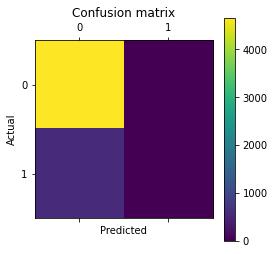

In [55]:
# Print the confusion matrix
logistic_matrix_diet = confusion_matrix(y_test_diet, logistic_diet_pred_test)
print(logistic_matrix_diet)

# Visualize the confusion matrix
plt.matshow(logistic_matrix_diet)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# again, our model ALMOST never predicts a positive (yes diabetes) case

### RQ3-3: Decision Tree

In [56]:
# Define our classifier model, fit using the prior defined train-test split
treeclf_diet = tree.DecisionTreeClassifier(min_samples_split=15, random_state=407)
treeclf_diet = treeclf_diet.fit(X_train_diet, y_train_diet)

# Predict Diabetes
treeclf_diet_pred_test = treeclf_diet.predict(X_test_diet)

In [57]:
# Accuracy Score for Testing Data
print(treeclf_diet.score(X_test_diet, y_test_diet))

0.8521556657764212


In [58]:
# Accuracy Score for Training Data
print(treeclf_diet.score(X_train_diet, y_train_diet))

# Way overfit on the training data

0.9168614357262104


In [59]:
# Print the classification report
print(classification_report(y_test_diet, treeclf_diet_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4668
         1.0       0.14      0.07      0.10       574

    accuracy                           0.85      5242
   macro avg       0.52      0.51      0.51      5242
weighted avg       0.81      0.85      0.83      5242



[[4426  242]
 [ 533   41]]


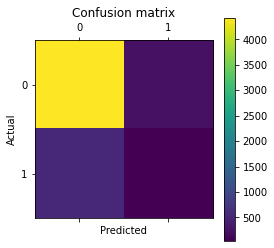

In [60]:
# Print the confusion matrix
treeclf_matrix_diet = confusion_matrix(y_test_diet, treeclf_diet_pred_test)
print(treeclf_matrix_diet)

# Visualize the confusion matrix
plt.matshow(treeclf_matrix_diet)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# This model at least predicts a significant amount of positive cases

## 4 - Combined: All Features?


In [61]:
# Now, let's try to predict diabetes using all the features
all_features_df = pd.concat([substance_df, exercise_df, diet_df, target_df], axis=1)
all_features_df

,SMKAGE_A,CIGNOW_A,SMK30D_A,CIGAR30D_A,DRK12MN_A,DRK12MYR_A,DRKAVG12M_A,DRKBNG30D_A,MODNR_A,VIGNR_A,...,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
0,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3.0,0.0,...,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,18.0,NaN,NaN,NaN,9.0,108.0,NaN,NaN,7.0,1.0,...,20.0,5.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,0.0
2,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,7.0,3.0,...,7.0,4.0,3.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0
3,NaN,NaN,NaN,0.0,12.0,12.0,1.0,NaN,0.0,0.0,...,0.0,3.0,2.0,2.0,1.0,4.0,1.0,0.0,2.0,0.0
4,NaN,NaN,NaN,NaN,1.0,52.0,1.0,NaN,0.0,0.0,...,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,40.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,...,3.0,3.0,1.0,5.0,3.0,2.0,0.0,1.0,0.0,0.0
27647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
27648,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,0.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
27649,18.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3.0,5.0,...,2.0,1.0,2.0,2.0,2.0,6.0,0.0,1.0,1.0,0.0


In [62]:
# Check for nulls
all_features_df.isnull().sum()

SMKAGE_A       17887
CIGNOW_A       25236
SMK30D_A       26957
CIGAR30D_A     19939
DRK12MN_A       4086
DRK12MYR_A      4090
DRKAVG12M_A     9277
DRKBNG30D_A    22208
MODNR_A         1139
VIGNR_A         1146
MODMIN_A        8783
VIGMIN_A       18187
SODANO_A        1055
FRJUICNO_A      1090
COFFEENO_A      1049
SPORDRNO_A      1049
FRTDRNO_A       1067
FRUITNO_A       1090
SALADNO_A       1086
POTATONO_A      1133
FRIESNO_A       1100
BEANSNO_A       1138
OVEGNO_A        1141
SALSANO_A       1135
PIZZANO_A       1122
TOMSAUNO_A      1173
DIBEV_A           32
dtype: int64

In [63]:
# Drop same columns we have from above earlier
all_features_df = all_features_df.drop(columns=['CIGNOW_A', 'SMK30D_A', 'CIGAR30D_A', 'DRKBNG30D_A', 'DRK12MYR_A', 'VIGMIN_A'])
all_features_df

,SMKAGE_A,DRK12MN_A,DRKAVG12M_A,MODNR_A,VIGNR_A,MODMIN_A,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,...,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
0,18.0,0.0,NaN,3.0,0.0,10.0,3.0,2.0,0.0,0.0,...,3.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,18.0,9.0,NaN,7.0,1.0,120.0,3.0,0.0,3.0,3.0,...,20.0,5.0,2.0,1.0,3.0,4.0,1.0,2.0,4.0,0.0
2,NaN,0.0,NaN,7.0,3.0,30.0,0.0,0.0,7.0,0.0,...,7.0,4.0,3.0,0.0,0.0,7.0,3.0,0.0,1.0,1.0
3,NaN,12.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,2.0,1.0,4.0,1.0,0.0,2.0,0.0
4,NaN,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27646,40.0,NaN,NaN,2.0,5.0,180.0,0.0,2.0,0.0,0.0,...,3.0,3.0,1.0,5.0,3.0,2.0,0.0,1.0,0.0,0.0
27647,NaN,NaN,NaN,4.0,2.0,240.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
27648,NaN,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
27649,18.0,0.0,NaN,3.0,5.0,30.0,2.0,0.0,0.0,2.0,...,2.0,1.0,2.0,2.0,2.0,6.0,0.0,1.0,1.0,0.0


In [64]:
# Now, drop nulls
all_features_df = all_features_df.dropna()
all_features_df

,SMKAGE_A,DRK12MN_A,DRKAVG12M_A,MODNR_A,VIGNR_A,MODMIN_A,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,...,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
6,17.0,1.0,2.0,5.0,2.0,60.0,3.0,0.0,0.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0
15,19.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0
17,28.0,2.0,2.0,7.0,0.0,40.0,5.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0
24,19.0,1.0,5.0,2.0,0.0,30.0,2.0,1.0,0.0,0.0,...,1.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0,0.0
32,10.0,2.0,3.0,30.0,30.0,180.0,1.0,5.0,30.0,0.0,...,4.0,6.0,4.0,2.0,3.0,7.0,10.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27608,17.0,2.0,4.0,1.0,0.0,30.0,1.0,0.0,0.0,0.0,...,2.0,3.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,0.0
27615,21.0,2.0,2.0,3.0,0.0,30.0,2.0,1.0,1.0,2.0,...,0.0,0.0,1.0,1.0,1.0,3.0,5.0,4.0,2.0,0.0
27632,18.0,1.0,2.0,1.0,0.0,180.0,1.0,3.0,0.0,1.0,...,5.0,5.0,10.0,10.0,5.0,1.0,0.0,4.0,4.0,0.0
27634,18.0,1.0,1.0,1.0,0.0,25.0,0.0,30.0,0.0,30.0,...,30.0,1.0,2.0,1.0,0.0,30.0,1.0,1.0,2.0,0.0


In [65]:
# Before we continue, check for Spearman correlation between the features and the target, threshold = 0.7
all_features_df.corr(method="spearman", numeric_only=True).round(2)

,SMKAGE_A,DRK12MN_A,DRKAVG12M_A,MODNR_A,VIGNR_A,MODMIN_A,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,...,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A,DIBEV_A
SMKAGE_A,1.00,-0.02,-0.07,0.00,0.01,-0.01,-0.04,0.00,-0.05,-0.01,...,0.00,0.03,-0.02,-0.04,0.01,0.02,-0.00,-0.02,-0.01,-0.04
DRK12MN_A,-0.02,1.00,0.10,0.05,0.02,0.03,-0.02,-0.00,-0.02,-0.01,...,0.02,0.05,0.05,0.02,0.05,0.05,0.05,0.04,0.05,-0.08
DRKAVG12M_A,-0.07,0.10,1.00,0.02,0.11,0.11,0.13,0.05,0.04,0.19,...,0.04,0.03,0.02,0.13,0.00,0.07,0.11,0.12,0.06,-0.08
MODNR_A,0.00,0.05,0.02,1.00,0.16,0.08,-0.03,-0.00,0.01,0.01,...,0.14,0.13,0.02,0.05,0.06,0.14,0.06,0.03,0.04,-0.02
VIGNR_A,0.01,0.02,0.11,0.16,1.00,0.13,-0.00,0.03,0.03,0.12,...,0.06,0.07,-0.01,0.05,0.06,0.04,0.14,0.06,0.04,-0.12
MODMIN_A,-0.01,0.03,0.11,0.08,0.13,1.00,0.02,0.02,0.00,0.09,...,0.02,0.02,0.03,0.05,0.02,0.04,0.06,0.02,0.02,-0.05
SODANO_A,-0.04,-0.02,0.13,-0.03,-0.00,0.02,1.00,0.22,0.21,0.20,...,0.05,-0.01,0.10,0.26,0.08,0.07,0.06,0.17,0.11,-0.07
FRJUICNO_A,0.00,-0.00,0.05,-0.00,0.03,0.02,0.22,1.00,0.12,0.15,...,0.15,0.07,0.12,0.15,0.12,0.10,0.07,0.12,0.14,-0.06
COFFEENO_A,-0.05,-0.02,0.04,0.01,0.03,0.00,0.21,0.12,1.00,0.09,...,0.09,0.05,0.05,0.09,0.05,0.11,0.02,0.06,0.07,-0.08
SPORDRNO_A,-0.01,-0.01,0.19,0.01,0.12,0.09,0.20,0.15,0.09,1.00,...,0.07,0.03,0.06,0.19,0.08,0.08,0.11,0.17,0.12,-0.09


### 4.1 - All Features Logistic Explanation

In [66]:
# No multicollienarity issues, so we can proceed

# Now, we split our data into the features (X) and target (y)
all_X = all_features_df.drop(['DIBEV_A'], axis=1)
all_y = all_features_df['DIBEV_A']

all_X

,SMKAGE_A,DRK12MN_A,DRKAVG12M_A,MODNR_A,VIGNR_A,MODMIN_A,SODANO_A,FRJUICNO_A,COFFEENO_A,SPORDRNO_A,FRTDRNO_A,FRUITNO_A,SALADNO_A,POTATONO_A,FRIESNO_A,BEANSNO_A,OVEGNO_A,SALSANO_A,PIZZANO_A,TOMSAUNO_A
6,17.0,1.0,2.0,5.0,2.0,60.0,3.0,0.0,0.0,2.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
15,19.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,1.0
17,28.0,2.0,2.0,7.0,0.0,40.0,5.0,0.0,0.0,0.0,7.0,1.0,0.0,4.0,2.0,3.0,2.0,0.0,2.0,2.0
24,19.0,1.0,5.0,2.0,0.0,30.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,1.0
32,10.0,2.0,3.0,30.0,30.0,180.0,1.0,5.0,30.0,0.0,0.0,4.0,6.0,4.0,2.0,3.0,7.0,10.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27608,17.0,2.0,4.0,1.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0
27615,21.0,2.0,2.0,3.0,0.0,30.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,5.0,4.0,2.0
27632,18.0,1.0,2.0,1.0,0.0,180.0,1.0,3.0,0.0,1.0,0.0,5.0,5.0,10.0,10.0,5.0,1.0,0.0,4.0,4.0
27634,18.0,1.0,1.0,1.0,0.0,25.0,0.0,30.0,0.0,30.0,0.0,30.0,1.0,2.0,1.0,0.0,30.0,1.0,1.0,2.0


In [67]:
# We add a constant to prepare for logistic regression (explanation model)
all_X = sm.add_constant(all_X)

# We fit our logistical regression model
all_logistic_exp = sm.Logit(all_y, all_X).fit()

# Checking the performance of the model
print(all_logistic_exp.summary())

# TODO: look at p-values in detail

Optimization terminated successfully.
         Current function value: 0.278538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                DIBEV_A   No. Observations:                 4712
Model:                          Logit   Df Residuals:                     4691
Method:                           MLE   Df Model:                           20
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                 0.03293
Time:                        12:41:16   Log-Likelihood:                -1312.5
converged:                       True   LL-Null:                       -1357.2
Covariance Type:            nonrobust   LLR p-value:                 9.538e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2562      0.216     -5.811      0.000      -1.680      -0.833
SMKAGE_A       -0.0233    

In [68]:
# Exponentializing the Beta Coefficients to convert them into Odds Ratios
np.exp(all_logistic_exp.params)

# For odds ratios - if it is greater than 1, event is more likely to occur, if it is < 1, the event is less likely to occur


const          0.284728
SMKAGE_A       0.976922
DRK12MN_A      0.994806
DRKAVG12M_A    0.966311
MODNR_A        0.996386
VIGNR_A        0.832047
MODMIN_A       0.997922
SODANO_A       0.977916
FRJUICNO_A     0.967987
COFFEENO_A     0.978559
SPORDRNO_A     0.947474
FRTDRNO_A      1.028544
FRUITNO_A      1.006669
SALADNO_A      0.991439
POTATONO_A     1.001932
FRIESNO_A      1.012361
BEANSNO_A      1.004954
OVEGNO_A       1.015630
SALSANO_A      0.954878
PIZZANO_A      0.931446
TOMSAUNO_A     0.982873
dtype: float64

In [69]:
# Exponetializing the 95% confidence interval to convert them into Odds Ratios
np.exp(all_logistic_exp.conf_int())

,0,1
const,0.186393,0.434942
SMKAGE_A,0.958967,0.995213
DRK12MN_A,0.987653,1.002011
DRKAVG12M_A,0.917601,1.017606
MODNR_A,0.970418,1.023050
VIGNR_A,0.765126,0.904822
MODMIN_A,0.995981,0.999866
SODANO_A,0.945992,1.010918
FRJUICNO_A,0.932427,1.004904
COFFEENO_A,0.953856,1.003902


### 4.2 - All Features Logistic Prediction

In [70]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_X, all_y, test_size=0.2, random_state=407)

# Define and fit our logistic regression model
logistic_all = LogisticRegression(max_iter=1000) # max_iter=1000 to avoid convergence warning with all the features
logistic_all = logistic_all.fit(X_train_all, y_train_all)

# Predict Diabetes
logistic_all_pred_test = logistic_all.predict(X_test_all)

In [71]:
# Accuracy Score for Testing Data
print(logistic_all.score(X_test_all, y_test_all))

0.9066808059384942


In [72]:
# Accuracy Score for Training Data
print(logistic_all.score(X_train_all, y_train_all))


0.9185460334306182


In [73]:
# Print the classification report
print(classification_report(y_test_all, logistic_all_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       855
         1.0       0.00      0.00      0.00        88

    accuracy                           0.91       943
   macro avg       0.45      0.50      0.48       943
weighted avg       0.82      0.91      0.86       943



[[855   0]
 [ 88   0]]


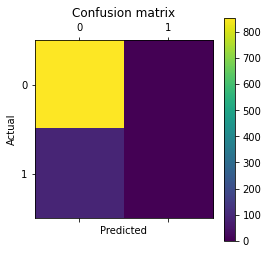

In [74]:
# Printing the confusion matrix
logistic_matrix_all = confusion_matrix(y_test_all, logistic_all_pred_test)
print(logistic_matrix_all)

# Visualizing the confusion matrix
plt.matshow(logistic_matrix_all)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Same issue as before, can't predict positive cases

### 4.3 All Features Decision Tree

In [75]:
# Define our classifier model, fit using the prior defined train-test split
treeclf_all = tree.DecisionTreeClassifier(min_samples_split=15, random_state=407)
treeclf_all = treeclf_all.fit(X_train_all, y_train_all)

# Predict Diabetes
treeclf_all_pred_test = treeclf_all.predict(X_test_all)

In [76]:
# Accuracy Score for Testing Data
print(treeclf_all.score(X_test_all, y_test_all))


0.8748674443266172


In [77]:
# Accuracy Score for Training Data
print(treeclf_all.score(X_train_all, y_train_all))

0.9424250464314141


In [78]:
# Print the classification report
print(classification_report(y_test_all, treeclf_all_pred_test, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       855
         1.0       0.17      0.09      0.12        88

    accuracy                           0.87       943
   macro avg       0.54      0.52      0.53       943
weighted avg       0.84      0.87      0.86       943



[[817  38]
 [ 80   8]]


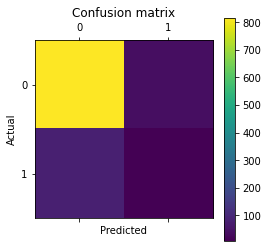

In [79]:
# Print the confusion matrix
treeclf_matrix_all = confusion_matrix(y_test_all, treeclf_all_pred_test)
print(treeclf_matrix_all)

# Visualize the confusion matrix
plt.matshow(treeclf_matrix_all)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()